## Dataset Dictionary

### **Context**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### **Attribute Information**
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [3]:
df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         22
Cholesterol        0
FastingBS          0
RestingECG         5
MaxHR              4
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

## Question
1. what do you think about the dataset ? is it makes sense to predict the target ?
2. fill the null values with soem value (anything technique can be used)
3. create model classification with logistic regression, decision tree, and knn and interpret the result of the model!
4. compare the accuracy of all 3 of model

## Handle Null Values

In [4]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = df_null['Missing Value'] / len(df) * 100
df_null['% Total Missing Value'] = df_null['% Total Missing Value'].round(2)
df_null

,column,Missing Value,% Total Missing Value
0,Age,0,0.00
1,Sex,0,0.00
2,ChestPainType,0,0.00
3,RestingBP,22,2.40
4,Cholesterol,0,0.00
5,FastingBS,0,0.00
6,RestingECG,5,0.54
7,MaxHR,4,0.44
8,ExerciseAngina,0,0.00
9,Oldpeak,0,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       896 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      913 non-null    object 
 7   MaxHR           914 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [6]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [7]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
df['RestingECG'].unique()

array(['Normal', 'ST', nan, 'LVH'], dtype=object)

In [9]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [10]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer


from sklearn.preprocessing import OneHotEncoder 
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [12]:
# Categorical
pipe_category_null = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# pipeline untuk kolom numerikal
pipe_numerical_null = Pipeline([
    ('imp_iterative', IterativeImputer()),
    ('robust', RobustScaler())
])


In [14]:
transformer = ColumnTransformer([
    ('pipe_iter_robust', pipe_numerical_null, ['RestingBP', 'MaxHR']),
    ('pipe_mode_onehot', pipe_category_null, ['RestingECG']),
    ('onehot', OneHotEncoder(drop='first'), ['ExerciseAngina', 'ST_Slope', 'ChestPainType', 'Sex']),
    ('robust', RobustScaler(), ['Age', 'Cholesterol', 'Oldpeak'])
], remainder='passthrough')

transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robust',
                                 Pipeline(steps=[('imp_iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['RestingBP', 'MaxHR']),
                                ('pipe_mode_onehot',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['RestingECG']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['ExerciseAngina', 'ST_Slope', 'ChestPainType',
                                  'Sex']),
                                ('robust', RobustScaler(),
                                 ['Age', 'Cholesterol', 'Oldpeak'])])

### Define X and y

In [15]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

### Train test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Transform data

In [17]:
# fit transformer ke train set
transformer.fit(X_train)

# transform transformer ke train set dan test set
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

In [18]:
transformer.get_feature_names_out()

array(['pipe_iter_robust__RestingBP', 'pipe_iter_robust__MaxHR',
       'pipe_mode_onehot__RestingECG_Normal',
       'pipe_mode_onehot__RestingECG_ST', 'onehot__ExerciseAngina_Y',
       'onehot__ST_Slope_Flat', 'onehot__ST_Slope_Up',
       'onehot__ChestPainType_ATA', 'onehot__ChestPainType_NAP',
       'onehot__ChestPainType_TA', 'onehot__Sex_M', 'robust__Age',
       'robust__Cholesterol', 'robust__Oldpeak', 'remainder__FastingBS'],
      dtype=object)

In [22]:
col_names = [col.split('__')[1] for col in transformer.get_feature_names_out()]
col_names

['RestingBP',
 'MaxHR',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'Age',
 'Cholesterol',
 'Oldpeak',
 'FastingBS']

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_list = []
acc_list = []

clf = LogisticRegression(random_state=42)
clf.fit(X_train_prep, y_train)
model_list.append('Logistic Regression')

y_pred = clf.predict(X_test_prep)

acc = accuracy_score(y_test, y_pred)
acc_list.append(acc)
acc

0.8782608695652174

In [24]:
clf.coef_[0]

array([-0.02262421, -0.2705071 , -0.33466872, -0.32987687,  0.88095068,
        0.92069465, -1.3670644 , -1.44324532, -1.70728068, -1.43958375,
        1.05487589,  0.11750841, -0.41975567,  0.40056394,  0.98880287])

In [25]:
df_coef = pd.DataFrame({
    'feature': col_names,
    'coef': clf.coef_[0]
})

df_coef.head()

,feature,coef
0,RestingBP,-0.022624
1,MaxHR,-0.270507
2,RestingECG_Normal,-0.334669
3,RestingECG_ST,-0.329877
4,ExerciseAngina_Y,0.880951


<AxesSubplot:xlabel='coef', ylabel='feature'>

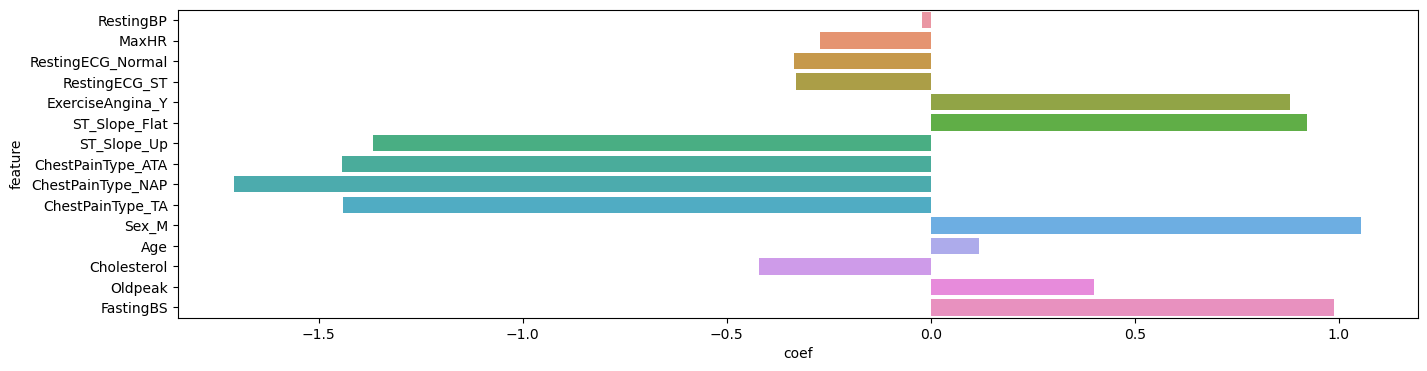

In [27]:
plt.figure(figsize=(16,4))
sns.barplot(data=df_coef, y='feature', x='coef')

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_prep, y_train)
model_list.append('KNN')

y_pred = clf.predict(X_test_prep)

acc = accuracy_score(y_test, y_pred)
acc_list.append(acc)
acc

0.8826086956521739

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_prep, y_train)
model_list.append('Decision Tree')

y_pred = clf.predict(X_test_prep)

acc = accuracy_score(y_test, y_pred)
acc_list.append(acc)
acc

0.8173913043478261

In [30]:
clf.feature_importances_

array([0.03254007, 0.13088308, 0.01134871, 0.01015473, 0.03618329,
       0.00419645, 0.40597101, 0.00509773, 0.00878728, 0.01293218,
       0.03288181, 0.0564002 , 0.13117125, 0.09116104, 0.03029117])

In [31]:
df_imp = pd.DataFrame({
    'feature': col_names,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

df_imp

,feature,importance
6,ST_Slope_Up,0.405971
12,Cholesterol,0.131171
1,MaxHR,0.130883
13,Oldpeak,0.091161
11,Age,0.056400
4,ExerciseAngina_Y,0.036183
10,Sex_M,0.032882
0,RestingBP,0.032540
14,FastingBS,0.030291
9,ChestPainType_TA,0.012932


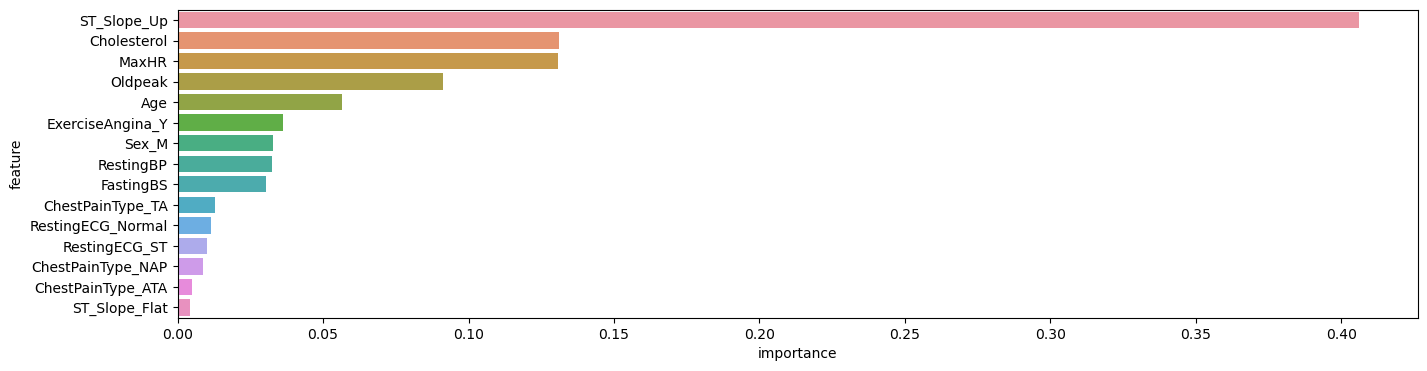

In [32]:
plt.figure(figsize=(16,4))
sns.barplot(data=df_imp, y='feature', x='importance');

## Comparison

In [36]:
df_acc = pd.DataFrame({
    'model': model_list,
    'accuracy': acc_list
}).sort_values('accuracy', ascending=False)

df_acc

,model,accuracy
1,KNN,0.882609
0,Logistic Regression,0.878261
2,Decision Tree,0.817391
